In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import exp
import os, time

# FORMATANDO BLOWING
- Definindo os critérios de "inicio" e "fim" de sopro manualmente, isso foi feito individualmente em cada arquivo usando o critério de derivada para isso, mas a ideia é o modelo servir de modo geral

In [79]:
def isBlowing(start, end):
    global is_blowing

    if start:
        is_blowing = True

    if end:
        is_blowing = False

    return is_blowing


fileNum  = 11
filePath = f'test_{fileNum}.csv'
df = pd.read_csv(filePath)
df.head()

,time,pressure,ratio,blowing,start_blow,stop_blow
0,92.1,114.8281,-0.405491,False,False,False
1,92.2,114.8213,-0.245485,False,False,False
2,92.3,114.8386,-0.121218,False,False,False
3,92.4,114.8724,-0.028557,False,False,False
4,92.5,114.9139,0.035034,False,False,False


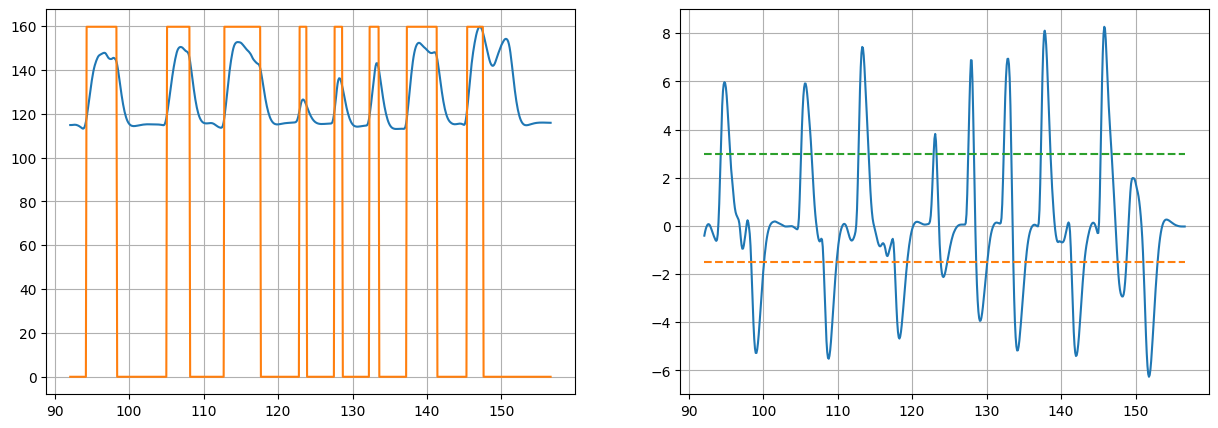

In [80]:
df = df.loc[df.time > 4.0]
is_blowing   = False
lower, upper = (-1.5, 3)

df['start_blow'] = df.ratio > upper
df['stop_blow']  = df.ratio < lower
df['blowing'] = df.apply(lambda row: isBlowing(row.start_blow, row.stop_blow), axis=1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(df.time, df.pressure)
plt.plot(df.time, df.blowing*df.pressure.max())
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(df.time, df.ratio)
plt.plot(df.time, lower * np.ones_like(df.time), '--')
plt.plot(df.time, upper * np.ones_like(df.time), '--')
plt.grid()
df.to_csv(filePath, index=None)

# JUNTANDO TABELAS
- Todos os arquivos agora serão juntados em 1 só, para isso, o tempo terá que iniciar (ser somado) partir do último valor do arquivo anterior (para ficar contínuo)

In [81]:
files = [file for file in os.listdir(None) if '.csv' in file]

def getAllFiles(files, showName=False):
    df = pd.DataFrame()

    for filePath in files:
        if showName:
            print(filePath)
        
        aux = pd.read_csv(filePath)
        aux['time'] = aux.time - aux.time.values[0]
        t0  = 0 if len(df) == 0 else df.time.values[-1]

        aux['time'] = aux.time + t0
        df = pd.concat([df, aux])

    return df


df = getAllFiles(files, showName=True) 
df

test_1.csv
test_10.csv
test_11.csv
test_2.csv
test_3.csv
test_4.csv
test_5.csv
test_6.csv
test_7.csv
test_8.csv
test_9.csv


,time,pressure,ratio,blowing,start_blow,stop_blow
0,0.0,38.131700,-0.385811,False,False,False
1,0.1,38.106850,-0.311824,False,False,False
2,0.2,38.089020,-0.244672,False,False,False
3,0.3,38.077120,-0.185016,False,False,False
4,0.4,38.070100,-0.133121,False,False,False
...,...,...,...,...,...,...
1200,1142.5,7.631976,-0.014643,False,False,False
1201,1142.6,7.631740,-0.012551,False,False,False
1202,1142.7,7.631571,-0.010327,False,False,False
1203,1142.8,7.631416,-0.008653,False,False,False


# OBTENDO A VARIAVEL DESEJADA
Os valores de início e fim de sopro são os pontos discretizados ao longo do gráfico, o objetivo do modelo é encontrar o momento que iniciou o sopro, e o momento que não há mais sopro

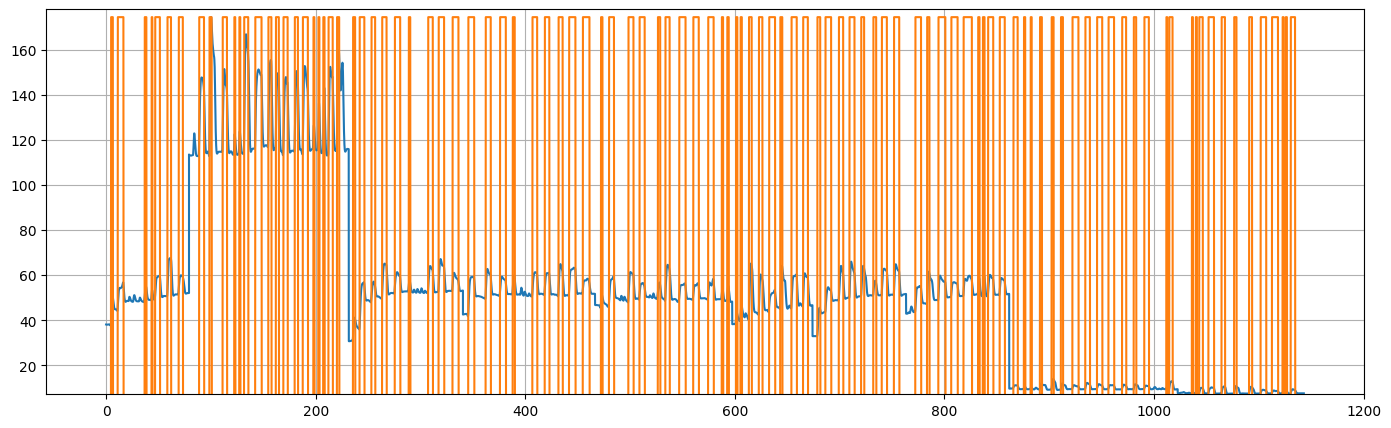

In [82]:
df.to_csv('../DataBase.csv', index=None)

plt.figure(figsize=(17, 5))
plt.plot(df.time, df.pressure)
plt.plot(df.time, df.blowing * df.pressure.max())
plt.ylim(df.pressure.min()*0.97, df.pressure.max()*1.02)
plt.grid()

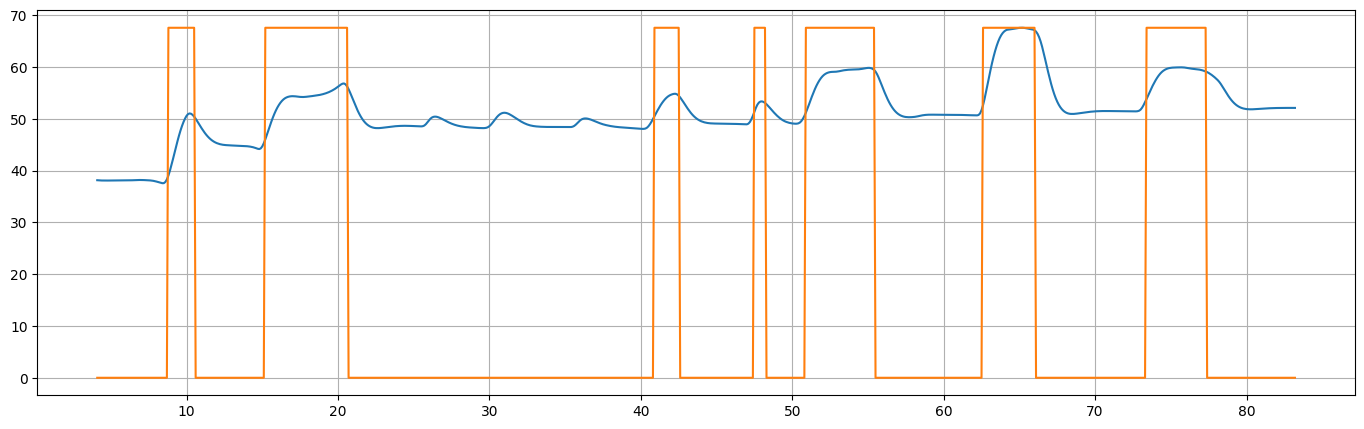

test_1.csv


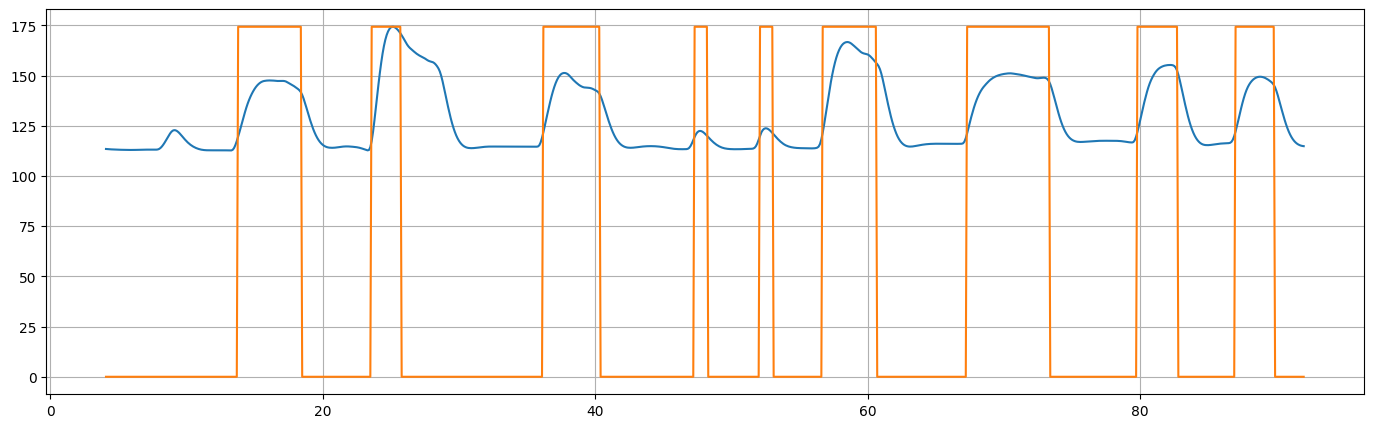

test_10.csv


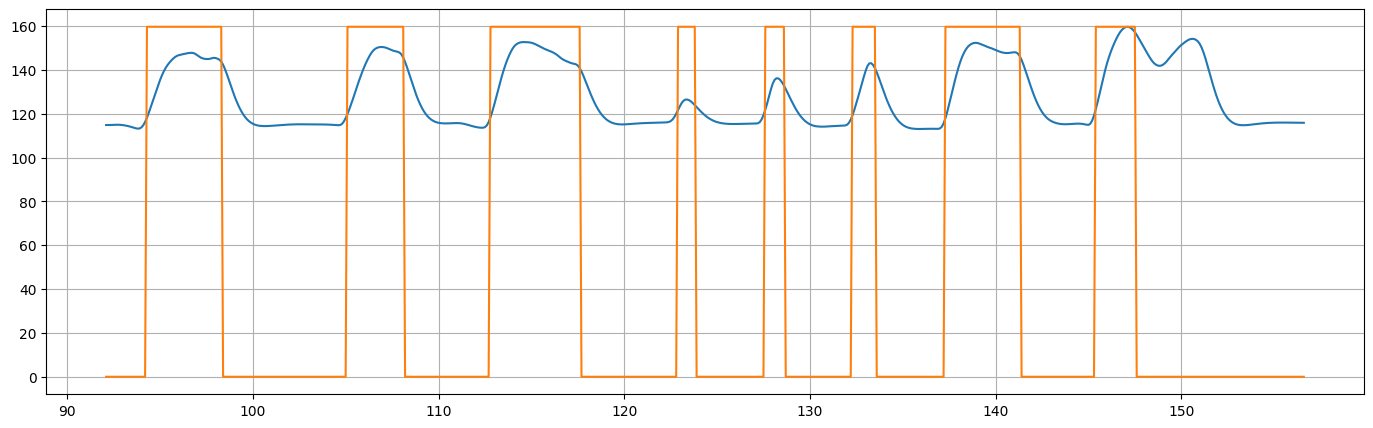

test_11.csv


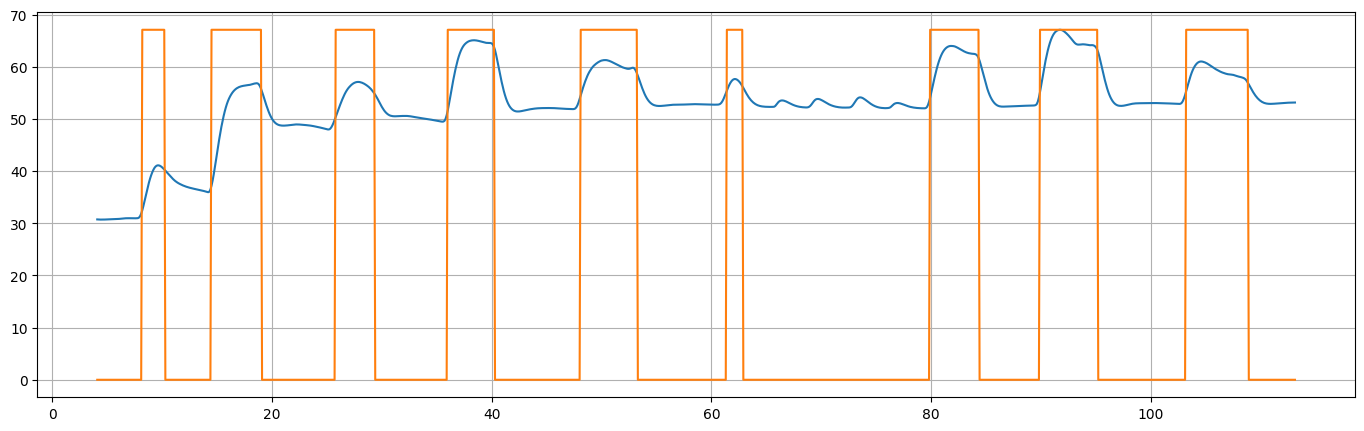

test_2.csv


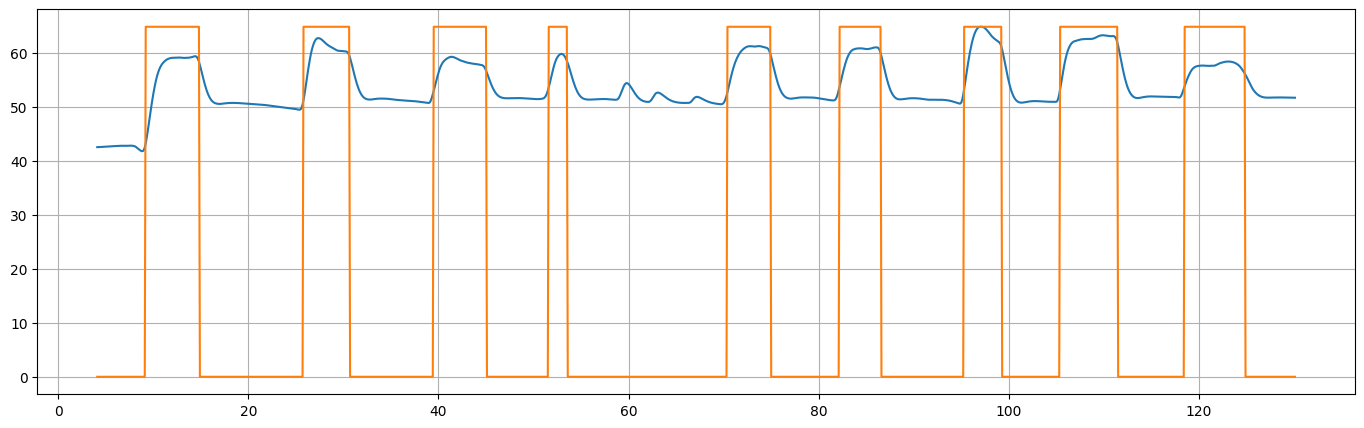

test_3.csv


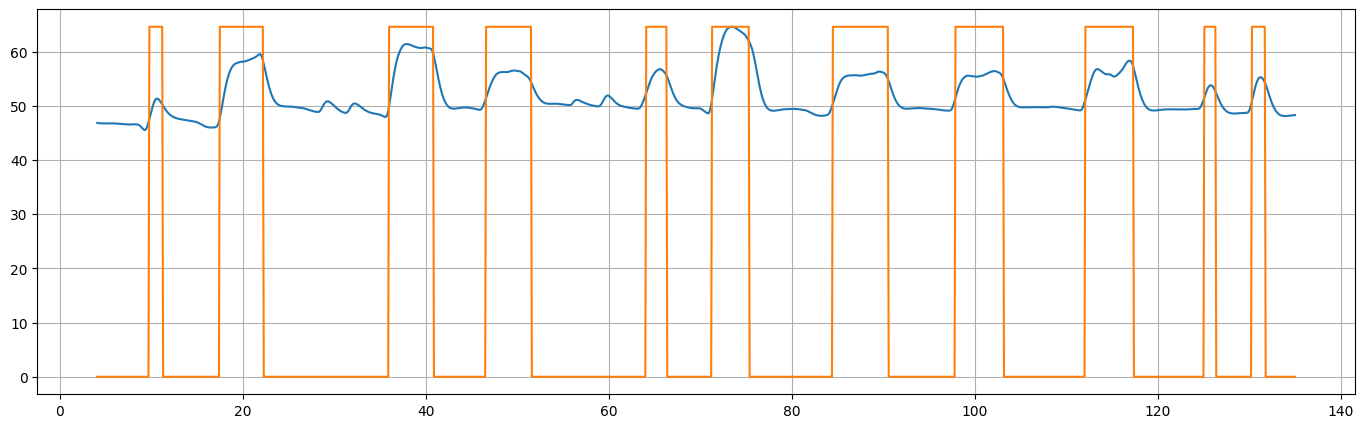

test_4.csv


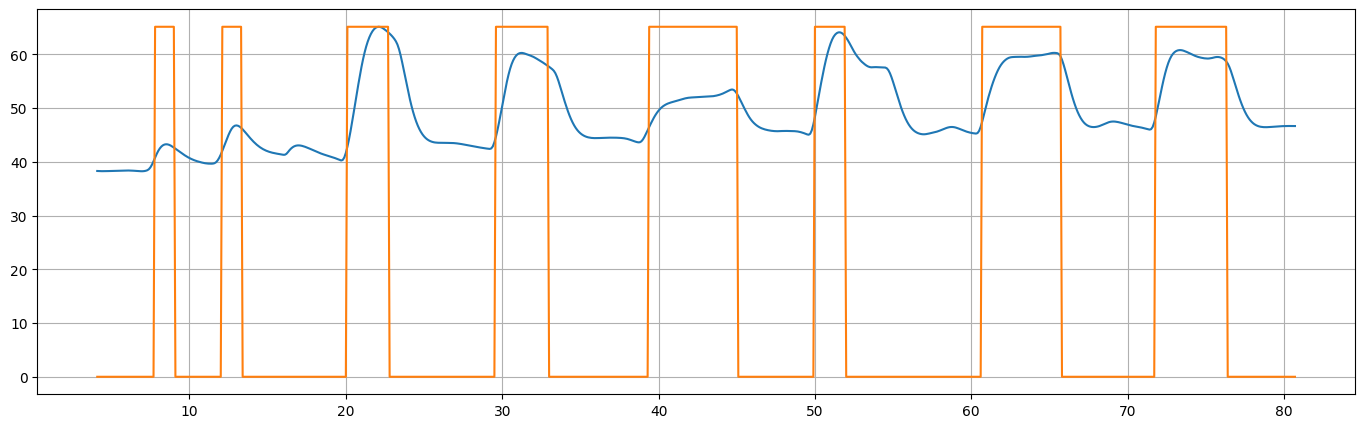

test_5.csv


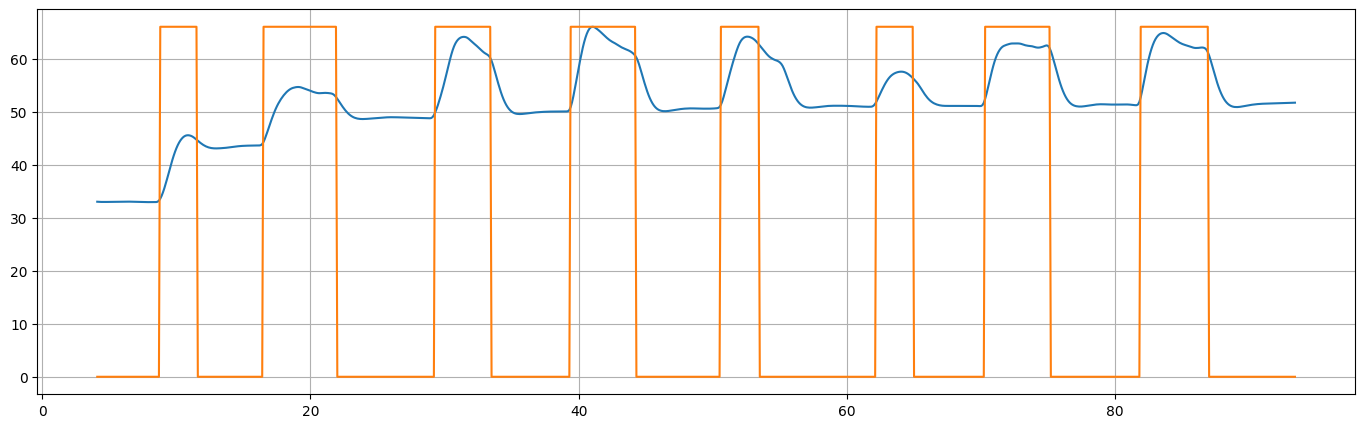

test_6.csv


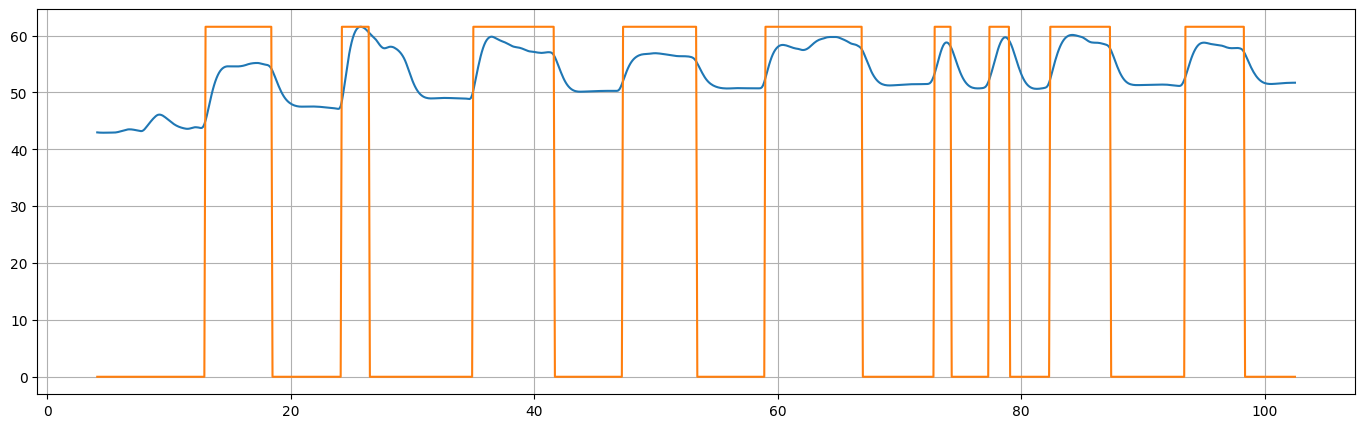

test_7.csv


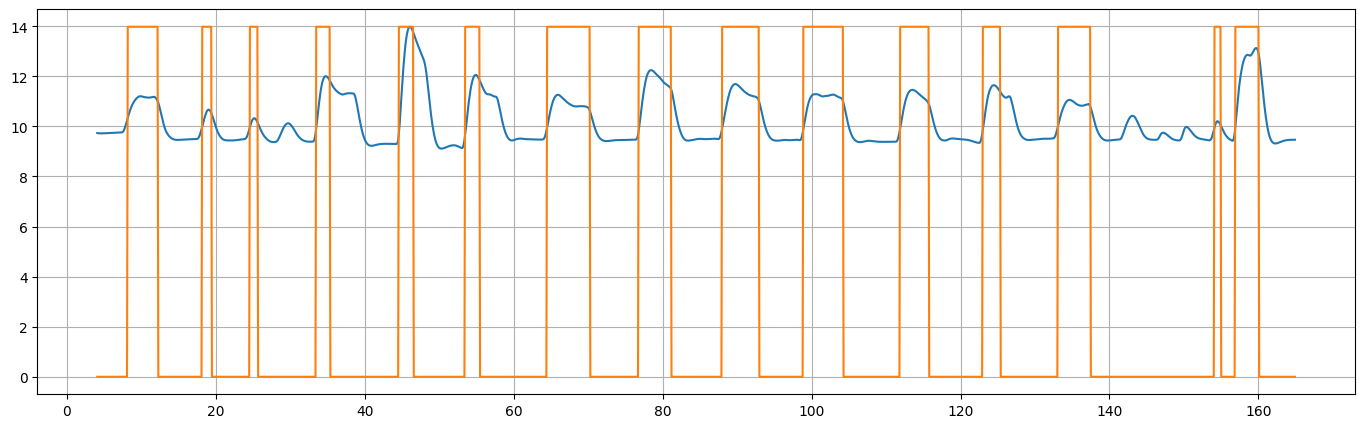

test_8.csv


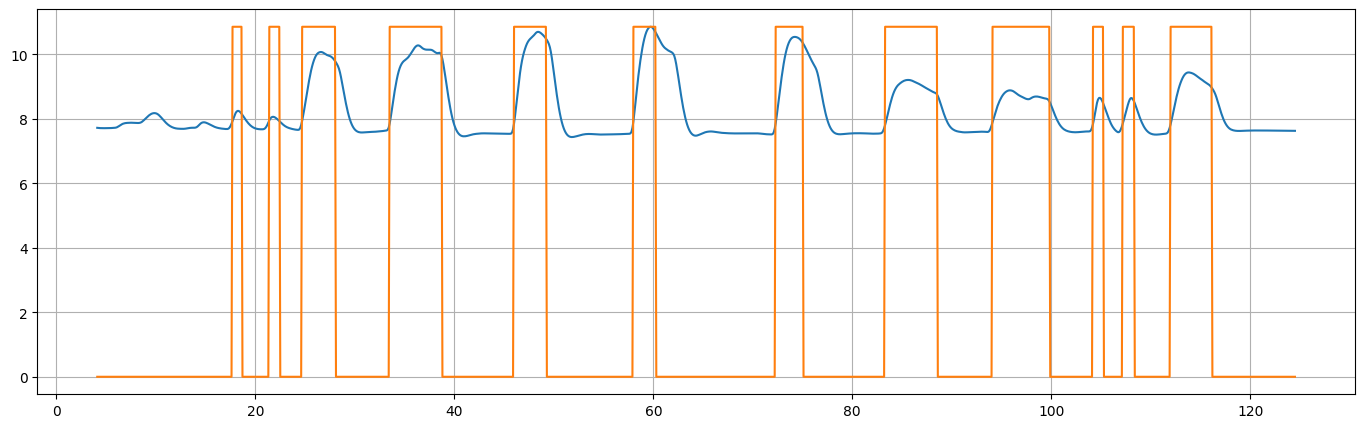

test_9.csv


In [83]:
for path in files:
    df = pd.read_csv(path)
    plt.figure(figsize=(17, 5))
    plt.plot(df.time, df.pressure)
    plt.plot(df.time, df.blowing * df.pressure.max())
    plt.grid(), plt.show(), print(path)